In [59]:
import pandas as pd
import json
from IPython.core.display import HTML

In [60]:
def books_json_to_dataframe(yr):
    import os
    main_dir = os.path.dirname(os.path.dirname(os.getcwd()))

    with open(main_dir + '\\' + yr + '\\notebook_version\\book_data.json') as f:
      books_data = json.load(f)
    
    df_ = pd.DataFrame(data=books_data['books'])
    
    return df_

In [61]:
df_books = books_json_to_dataframe('2023')

In [62]:
# Converting links to html tags
def path_to_image_html(path):
    return '<img src="'+ path + '" width="240" >'


In [63]:
df_books

,title,author,cover,pages,main_genre,sub_genre
0,Phasma,Delilah S. Dawson,https://m.media-amazon.com/images/I/81xWEb3ubS...,480,Fiction,Science Fiction


In [64]:
# let's change the layout before moving on

df_books = df_books[['cover','title','author','pages','main_genre','sub_genre']]

In [65]:
# Rendering the images in the dataframe using the HTML method with formatters

HTML(df_books.to_html(escape=False,formatters=dict(cover=path_to_image_html)))

,cover,title,author,pages,main_genre,sub_genre
0,,Phasma,Delilah S. Dawson,480,Fiction,Science Fiction


In [66]:
# you can also not use formatters but create the html in the field itself
# the cover image sizes differ so I prefer setting a defined image size like above
# I am chosing not to run this cell since it takes up a lot of space with the huge cover image sizes. =]
# df_books_alt = df_books.copy()
# df_books_alt['cover'] = '<img src="'+ df_books_alt['cover'] + '">'
# HTML(df_books_alt.to_html(escape=False))

## Filtering

In [67]:
# if we wanted to filter our list of books on certain criteria we can simply do this:

df_books[df_books['main_genre'] == 'Fiction']

,cover,title,author,pages,main_genre,sub_genre
0,https://m.media-amazon.com/images/I/81xWEb3ubS...,Phasma,Delilah S. Dawson,480,Fiction,Science Fiction


In [68]:
# however, we can make filtering more fun and interactive by using WIDGETS

import ipywidgets as widgets
from IPython.display import display

In [69]:
ALL = 'ALL'

def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [70]:
def dropdown_main_genre_eventhandler(change):
    output_main_genre.clear_output()
    with output_main_genre:
        if (change.new == ALL):
            display(df_books)
        else:
            display(df_books[df_books.main_genre == change.new])        
        
dropdown_main_genre = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_books.main_genre))

output_main_genre = widgets.Output()

dropdown_main_genre.observe(dropdown_main_genre_eventhandler, names='value')


def dropdown_sub_genre_eventhandler(change):
    output_sub_genre.clear_output()
    with output_sub_genre:
        if (change.new == ALL):
            display(df_books)
        else:
            display(df_books[df_books.sub_genre == change.new])        
        
dropdown_sub_genre = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_books.sub_genre))

output_sub_genre = widgets.Output()

dropdown_sub_genre.observe(dropdown_sub_genre_eventhandler, names='value')



def dropdown_author_eventhandler(change):
    output_author.clear_output()
    with output_author:
        if (change.new == ALL):
            display(df_books)
        else:
            display(df_books[df_books.author == change.new])        
        
dropdown_author = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_books.author))

output_author = widgets.Output()

dropdown_author.observe(dropdown_author_eventhandler, names='value')



In [71]:
display(dropdown_main_genre)

Dropdown(options=('ALL', 'Fiction'), value='ALL')

In [72]:
display(output_main_genre)

Output()

In [73]:
display(dropdown_sub_genre)

Dropdown(options=('ALL', 'Science Fiction'), value='ALL')

In [74]:
display(output_sub_genre)

Output()

In [75]:
display(dropdown_author)

Dropdown(options=('ALL', 'Delilah S. Dawson'), value='ALL')

In [76]:
display(output_author)

Output()

## Stats

In [77]:
total_books = df_books['title'].count()
total_pages = df_books['pages'].sum()
print('2023: \nTotal Books Read : ' + str(total_books) + ' \nTotal Pages Read: ' + str(total_pages))


2023: 
Total Books Read : 1 
Total Pages Read: 480


In [78]:
def get_percentage_of(part, whole):
    """
    This function takes two numbers and returns the percentage of the first number from the second number. 
    """
    result = 100 * (float(part) / float(whole))
    # return "{:.1%}".format(result)
    final = '%' + "{0:.2f}".format(result)
    return final


def get_percentage_diff(current, previous):
    """
    This returns the difference between 2 numbers and returns the result with visual formating.
    """
    if current == previous:
        return '%' + "{0:.2f}".format(100.0)
    try:
        return '%' + "{0:.2f}".format((abs(current - previous) / previous) * 100.0)
    except ZeroDivisionError:
        return 0

In [79]:
# let's make a dataframe that contains all the different yearly 'books i have read' datasets so we can compare stuffs. =]


def create_book_stats_dataframe():
    book_stats = []
    
    df_books_2019 = books_json_to_dataframe('2019')
    df_books_2020 = books_json_to_dataframe('2020')
    df_books_2021 = books_json_to_dataframe('2021')
    df_books_2022 = books_json_to_dataframe('2022')
    df_books_2023 = books_json_to_dataframe('2023')
    
    
    book_stats.append([2019, df_books_2019['title'].count(), df_books_2019['pages'].sum()])
    book_stats.append([2020, df_books_2020['title'].count(), df_books_2020['pages'].sum()])
    book_stats.append([2021, df_books_2021['title'].count(), df_books_2021['pages'].sum()])
    book_stats.append([2022, df_books_2022['title'].count(), df_books_2022['pages'].sum()])
    book_stats.append([2023, df_books_2023['title'].count(), df_books_2023['pages'].sum()])
    
    df_book_stats_ = pd.DataFrame(data=book_stats, columns=['year','total_books','total_pages'])
    
    return df_book_stats_

In [80]:
df_book_stats = create_book_stats_dataframe()

In [81]:
# i want to see some percentage differences between the years

df_book_stats['total_pages_perc_of_prv_yr'] = ''
df_book_stats['total_pages_perc_diff_prv_yr'] = ''
df_book_stats['total_books_perc_of_prv_yr'] = ''
df_book_stats['total_books_perc_diff_prv_yr'] = ''



for index, row in df_book_stats.iterrows():
    if row['year'] == 2019:
        pass
    else:
        ttlpgs = row['total_pages']
        prev_yr = row['year'] -1
        prev_yr_ttlpgs = df_book_stats[df_book_stats['year'] == prev_yr]['total_pages'].iloc[0]
        perc_off = get_percentage_of(ttlpgs, prev_yr_ttlpgs)
        perc_diff = get_percentage_diff(ttlpgs, prev_yr_ttlpgs)
        
        df_book_stats.at[index, 'total_pages_perc_of_prv_yr'] = perc_off
        df_book_stats.at[index, 'total_pages_perc_diff_prv_yr'] = perc_diff

        ttlbks = row['total_books']
        
        prev_yr_ttlbks = df_book_stats[df_book_stats['year'] == prev_yr]['total_books'].iloc[0]
        perc_off = get_percentage_of(ttlbks, prev_yr_ttlbks)
        perc_diff = get_percentage_diff(ttlbks, prev_yr_ttlbks)
        
        df_book_stats.at[index, 'total_books_perc_of_prv_yr'] = perc_off
        df_book_stats.at[index, 'total_books_perc_diff_prv_yr'] = perc_diff
        
        

In [82]:
df_book_stats

,year,total_books,total_pages,total_pages_perc_of_prv_yr,total_pages_perc_diff_prv_yr,total_books_perc_of_prv_yr,total_books_perc_diff_prv_yr
0,2019,22,6719,,,,
1,2020,24,9801,%145.87,%45.87,%109.09,%9.09
2,2021,33,13780,%140.60,%40.60,%137.50,%37.50
3,2022,32,12939,%93.90,%6.10,%96.97,%3.03
4,2023,1,480,%3.71,%96.29,%3.12,%96.88


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
def create_basic_barplot(df, x_value, y_value, title, x_label, y_label):
    plt.subplots(figsize=(15, 6))
    chart = sns.barplot(x=x_value, y=y_value, data=df, palette=sns.color_palette("Set1", n_colors=8, desat=.5))
    chart.axhline(df[y_value].mean())
    chart = chart.set_title(title, fontsize = 18)
    chart = plt.xlabel(x_label, fontsize = 12)
    chart = plt.ylabel(y_label, fontsize = 12)
    # chart = plt.ylim(0, df[y_value].max())

    return

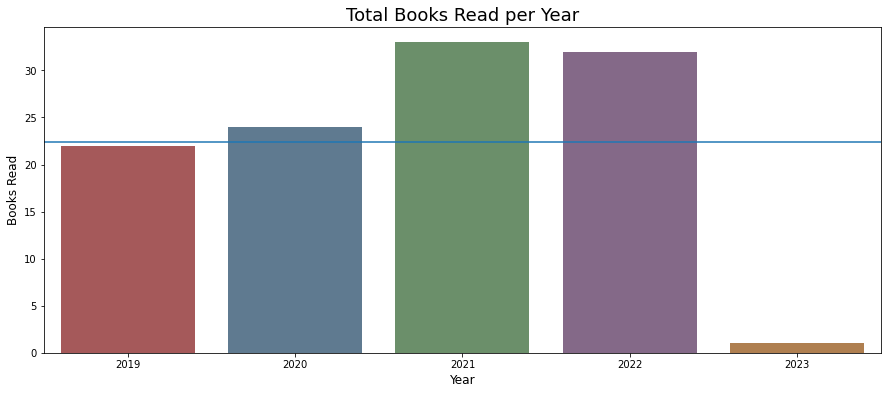

In [85]:
create_basic_barplot(df_book_stats[['year','total_books']],'year','total_books','Total Books Read per Year','Year','Books Read')

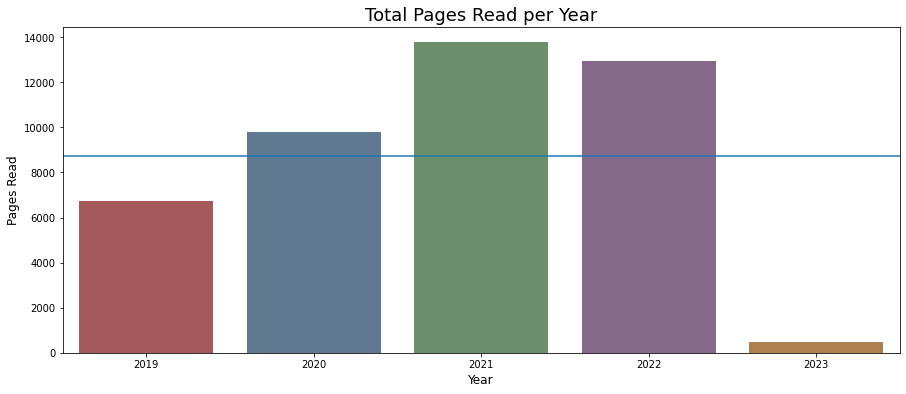

In [86]:
create_basic_barplot(df_book_stats[['year','total_pages']],'year','total_pages','Total Pages Read per Year','Year','Pages Read')

In [87]:
# let's get an author count
df_authors = pd.DataFrame({'total' : df_books.groupby(['author'])['author'].count()}).reset_index()
df_authors.sort_values(by='total', ascending=False, inplace=True)

In [88]:
df_authors

,author,total
0,Delilah S. Dawson,1


In [89]:
# top 3 authors
df_authors[:3]

,author,total
0,Delilah S. Dawson,1


In [90]:
# we can also look at timeline, era, storyline

# let's get an author count
df_sub_genres = pd.DataFrame({'total' : df_books.groupby(['sub_genre'])['sub_genre'].count()}).reset_index()
df_sub_genres.sort_values(by='total', ascending=False, inplace=True)

df_main_genres = pd.DataFrame({'total' : df_books.groupby(['main_genre'])['main_genre'].count()}).reset_index()
df_main_genres.sort_values(by='total', ascending=False, inplace=True)

In [91]:
df_main_genres

,main_genre,total
0,Fiction,1


In [92]:
df_sub_genres

,sub_genre,total
0,Science Fiction,1


In [93]:
# to render the dataframe as an html table
#df_books.to_html(escape=False, formatters=dict(cover=path_to_image_html))

# Saving the dataframe as a webpage
df_books.to_html('books_i_have_read_2022.html',escape=False, formatters=dict(cover=path_to_image_html))